In [2]:
!git clone https://github.com/YvanDavidHerChar/HernandezYvan_Ejercicio24

Cloning into 'HernandezYvan_Ejercicio24'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [4]:
%ls


HernandezYvan_Ejercicio24/  sample_data/


In [5]:
cd HernandezYvan_Ejercicio24/


/content/HernandezYvan_Ejercicio24


In [6]:
ls

README.md  slice_localization_data.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Importamos todos los modulos de scikit learn
from sklearn.linear_model import LogisticRegression
import sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import f1_score

Carguemos los datos del data set: https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis# \\
F. Graf, H.-P. Kriegel, M. Schubert, S. Poelsterl, A. Cavallaro (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Ludwig-Maximilians-UniversitÃt Munich  


In [0]:
# Carga datos
data = pd.read_csv('slice_localization_data.csv')
data.head
data = data.dropna()


Organizo los X, son los dos histogramas para cada uno de los cortes de CT (solo tomaremos 4000 por tiempo computacional...), y los Y son la ubicacion correspondiente del corte en el cuerpo. 

In [0]:
Y = np.array(data['reference'])
Y = np.rint(Y) 
data= data.drop(['patientId','reference'],axis=1)
data = data[:4000]
Y = Y[:4000]

Ahora voy a separarlos en train y test

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, train_size=0.5)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
train_samples = len(X_train)

In [11]:
print(Y)


[22. 22. 22. ... 83. 78. 78.]


In [28]:
ces = np.logspace(-3,3, 10)
f1_l1  = []
f1_l2  = []
for i in range(len(ces)):
    clf1 = LogisticRegression(C=ces[i], penalty='l1', solver='saga', tol=0.1)
    clf1.fit(X_train, y_train)
    print('Uno')
    clf2 = LogisticRegression(C=ces[i], penalty='l2', solver='saga', tol=0.1)
    clf2.fit(X_train, y_train)
    print('Otro')
    f1_l1.append(f1_score(y_test, clf1.predict(X_test), average='macro'))
    f1_l2.append(f1_score(y_test, clf2.predict(X_test), average='macro'))

Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro


Para apreciar la diferencia de comportamiento se grafican en escala logaritmica.

Text(0.5, 1.0, 'Evolucion del F1 score con C para diferentes regularizaciones')

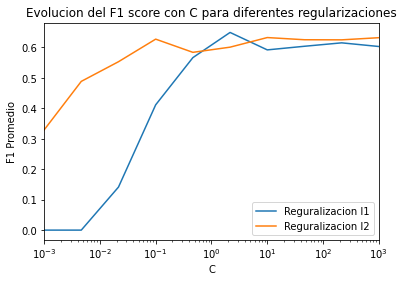

In [29]:
plt.plot(ces,f1_l1, label='Reguralizacion l1')
plt.plot(ces,f1_l2, label='Reguralizacion l2')
plt.legend()
plt.xlabel('C')
plt.ylabel('F1 Promedio')
plt.xscale("log")
plt.xlim([0.001,1000])
plt.title('Evolucion del F1 score con C para diferentes regularizaciones')

In [30]:
print(max(f1_l1))

0.649371871985772


Ahora vamos a realizar el experimento con las redes neuronales para poder comparar el F1 promedio con los obtenidos con la regression logistica. Tomaremos el valor de la RL como 0.65

Nuestro primer experimento se hara con una sola capa oculta

In [0]:
#Sabemos que el numero de posibles ubicaciones de los CT son de 0 a 180. Por lo que K=180
loss=[]
F1_test = []
K=180
for i in range(K):
    n = i+1
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(n,),max_iter=500)
    mlp.fit(X_train, y_train)
    loss.append(mlp.loss_)
    F1_test.append(sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro'))
    print('Se completaron %i neuronas'% n)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 1 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 2 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 3 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 4 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 5 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 6 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 7 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 8 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 9 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 10 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 11 neuronas


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Se completaron 12 neuronas


In [0]:
#Graficamos la evolucion de la funcion de perdida y de F1
x = np.linspace(0,180,K)
RL = 0.65
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x,loss)
plt.title('Evolucion de la funcion de perdida')
plt.xlabel('Numero de neuronas')
plt.ylabel('Loss_')
plt.hline(RL)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x,F1_test, label='Test')
plt.plot(x,F1_train, label='Train')
plt.hline(RL, label = 'RL')
plt.grid(True)
plt.legend()
plt.title('Evolucion de la funcion de F1 sobre el test')
plt.xlabel('Numero de neuronas')
plt.ylabel('F1')

plt.show()

In [0]:
loss_2=[]
F1_test_2 = []
K=180
for i in range(K-2):
    n = i+2
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(K/2,n),max_iter=2500)
    mlp.fit(X_train, y_train)
    loss_2.append(mlp.loss_)
    F1_test_2.append(sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro'))
    print('Se completaron %i neuronas'% n)